In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re
from scipy import stats

In [18]:
import pandas as pd
titanic = pd.read_csv('/Users/conorcampbell/Downloads/train.csv')

In [19]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
titanic.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [172]:
Age_Details = titanic['Age'].describe(percentiles = [.25, .5, .75,.90]).round(2)

display(Age_Details)
print("Here we can see that we know the ages of 714 of the people who were on board the Titanic. The average age of a passenger was 29.71 years old.")

count    714.00
mean      29.71
std       14.53
min        0.00
25%       20.25
50%       28.00
75%       38.00
90%       50.00
max       80.00
Name: Age, dtype: float64

Here we can see that we know the ages of 714 of the people who were on board the Titanic. The average age of a passenger was 29.71 years old.


We can see here that out of the people that survived the sinking of the Titanic, 233 were female and 109 were male


,Survived
Sex,
female,233
male,109


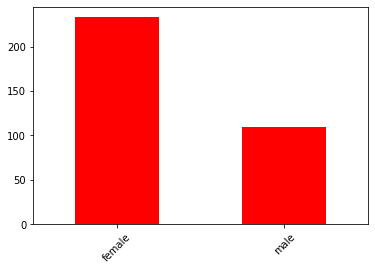

In [202]:
survivors = titanic[titanic.Survived == 1]

print("We can see here that out of the people that survived the sinking of the Titanic, 233 were female and 109 were male")
display(survivors.groupby('Sex')[['Survived']].count())
survivors['Sex'].value_counts()[:2].plot(kind='bar', rot = 45, color = 'r')


In [190]:
print("The average age of a Female survivor was 28.85 years old, while the average Male survivor was 27.28 years old.")
survivors.groupby('Sex')[['Age']].mean()

The average age of a Female survivor was 28.85 years old, while the average Male survivor was 27.28 years old.


,Age
Sex,
female,28.852792
male,27.279570


In [204]:
money_survival = titanic.groupby('Survived')[['Fare']].mean()

print("From what we see here, it is clear that survivors consisted more of people who paid higher prices for their tickets.")
money_survival.round(2)

From what we see here, it is clear that survivors consisted more of people who paid higher prices for their tickets.


,Fare
Survived,
0,22.12
1,48.40


In [91]:
display(titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


What we can see here is that if you paid a higher price for your ticket on the Titanic, the better the chance was that you were going to be prioritzed for a spot on one of the lifeboats.


,Fare
Survived,
0,22.12
1,48.40


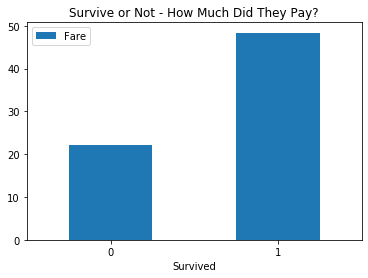

In [166]:
money_survival.plot(kind='bar',rot = 0)
plt.title('Survive or Not - How Much Did They Pay?')

print("What we can see here is that if you paid a higher price for your ticket on the Titanic, the better the chance was that you were going to be prioritzed for a spot on one of the lifeboats.")

money_survival.round(2)

In [122]:
females = titanic[titanic.Sex.str.contains("Female",flags=re.IGNORECASE)]
display(females)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


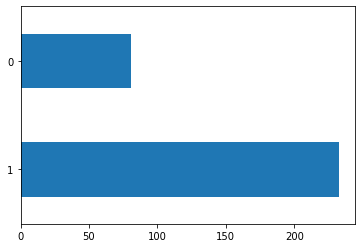

In [161]:
females['Survived'].value_counts()
females['Survived'].value_counts().plot(kind='barh')

,Fare
Survived,
0,23.02
1,51.94


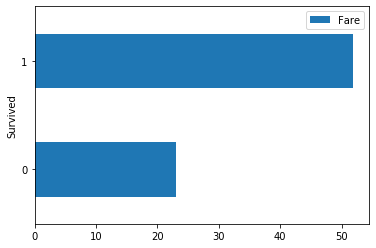

In [163]:
females.groupby('Survived')[['Fare']].mean().plot(kind='barh')
females_fare = females.groupby('Survived')[['Fare']].mean()
females_fare.round(2)